# Exercise 1

In this exercise we use the Iris dataset, which is a 3-class dataset in which 1 class is linearly separable from the others but the other are not linearly separable from each other. The classes correpond to different types of Iris plants while the 4 features represent the dimensions of the leaves. It is a typical test case for many statistical classification techniques in machine learning. You can read more here:https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

We can load the dataset with:

In [5]:
from sklearn.datasets import load_iris

(X, y) = load_iris(return_X_y=True)

X and y are the features and the label, respectively. We can look at the format of the data:

In [6]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 150 samples in the dataset. X has 4 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

We can plot some features against each other to see how the features relate to each other:

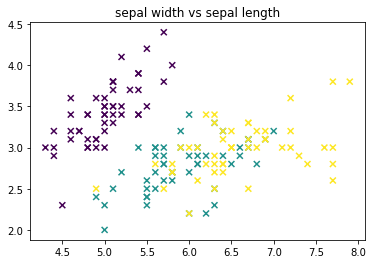

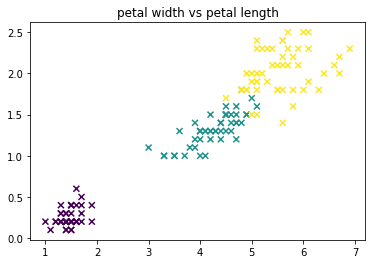

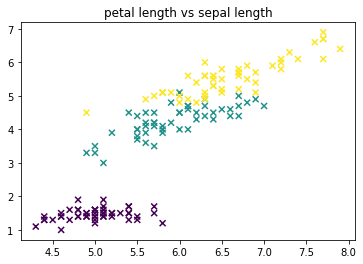

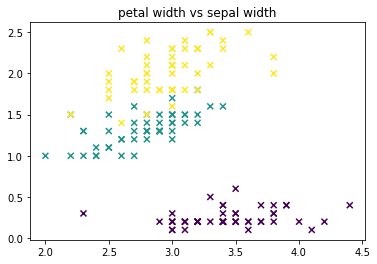

In [8]:
features = ["sepal length", "sepal width", "petal length", "petal width"]

permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], marker="x", c=y)
    plt.show()

We can see that one class is separable from the others, while perfectly separating the other two classes linearly is not possible. Your tasks in this notebook are now:

- Add and adapt your classification code from the binary classification exercise, so that is can predict the class label for each sample.
- Use the sklearn method [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to obtain an evaluation of the classification performance. The result should be:

<pre>
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9600    0.9600    0.9600        50
          2     0.9600    0.9600    0.9600        50

avg / total     0.9733    0.9733    0.9733       150
</pre>

## Solution

TASK1 . with linear regression "

TASK2 . with logistic regression 

Solution: Using the knowledge of linear regression, I initially applied a linear regression approach for classification. However, the classification report showed that the results were not accurate. I then updated the approach to use logistic regression, which provided significantly better results. Please refer to the code below, and note that it is structured in two distinct parts—linear regression and logistic regression—for comparison.

TASK 1 . LINER REGRESSION 

Classification Report for Linear Regression (One-vs-Rest):
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        50
     Class 1       0.83      0.68      0.75        50
     Class 2       0.73      0.86      0.79        50

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



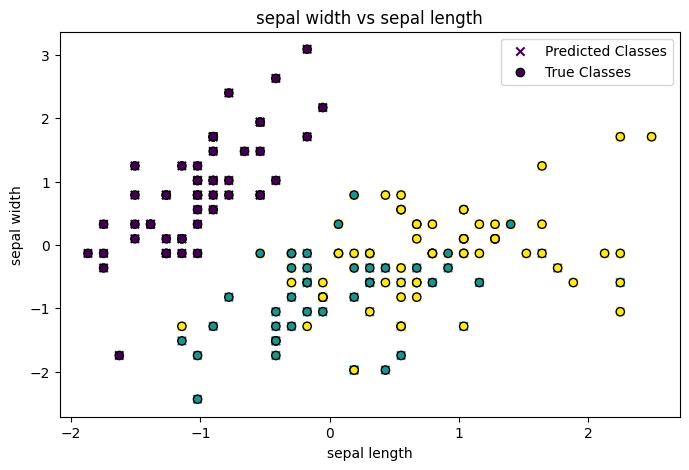

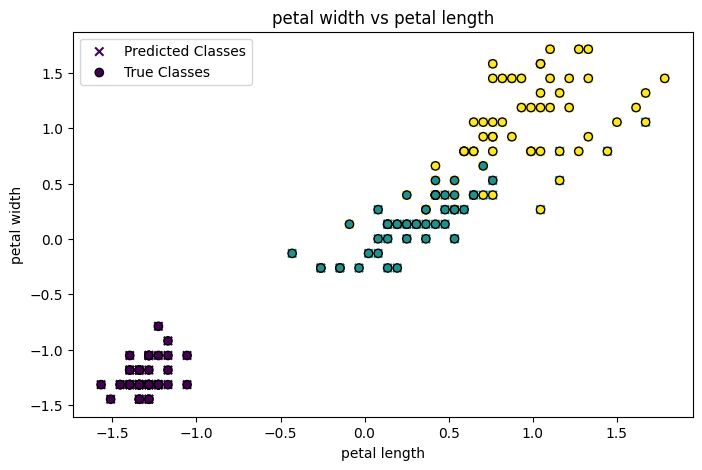

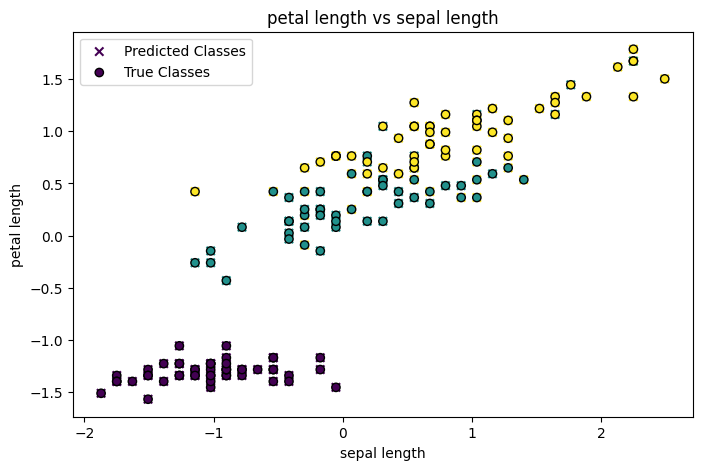

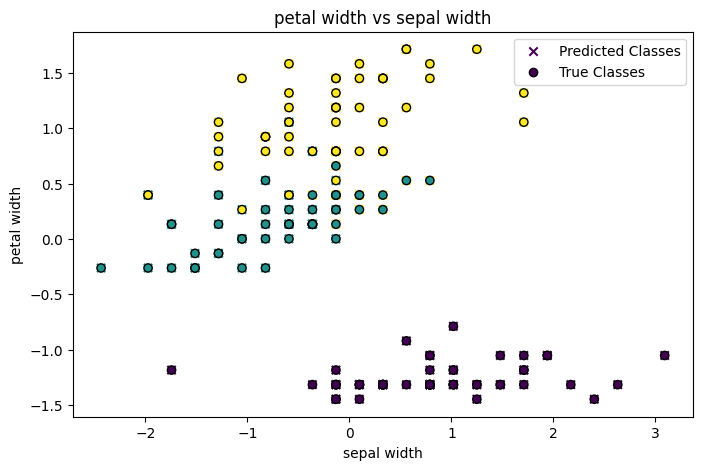

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


(X, y) = load_iris(return_X_y=True)
features = ["sepal length", "sepal width", "petal length", "petal width"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
models = []

for class_label in range(3):
    
    binary_y = (y == class_label).astype(int)
    
    
    model = LinearRegression()
    model.fit(X_scaled, binary_y)
    
  
    models.append(model)


predictions = np.array([model.predict(X_scaled) for model in models]).T
y_pred = np.argmax(predictions, axis=1)  


report = classification_report(y, y_pred, target_names=["Class 0", "Class 1", "Class 2"])
print("Classification Report for Linear Regression (One-vs-Rest):\n", report)


permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]
for i, j in permutations:
    plt.figure(figsize=(8, 5))
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X_scaled[:, i], X_scaled[:, j], marker="x", c=y_pred, cmap="viridis", label="Predicted Classes")
    plt.scatter(X_scaled[:, i], X_scaled[:, j], marker="o", facecolors='none', edgecolors='k', c=y, cmap="viridis", label="True Classes")
    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.legend(["Predicted Classes", "True Classes"])
    plt.show()


##TASK 2 : LOGISTIC REGRESSION

Classification Report for Logistic Regression (One-vs-Rest):
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        50
     Class 1       0.92      0.92      0.92        50
     Class 2       0.92      0.92      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



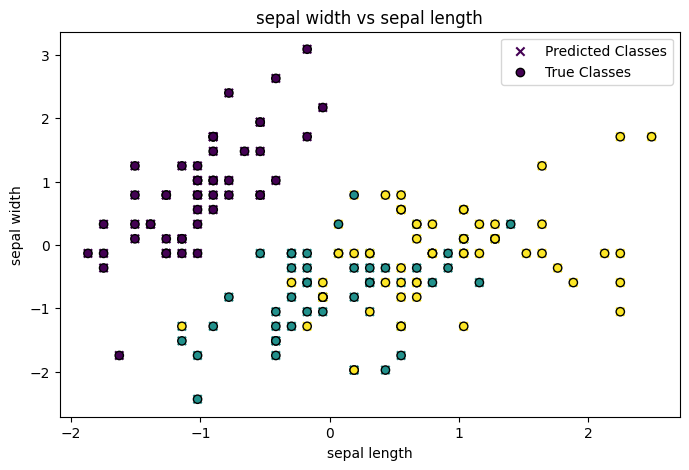

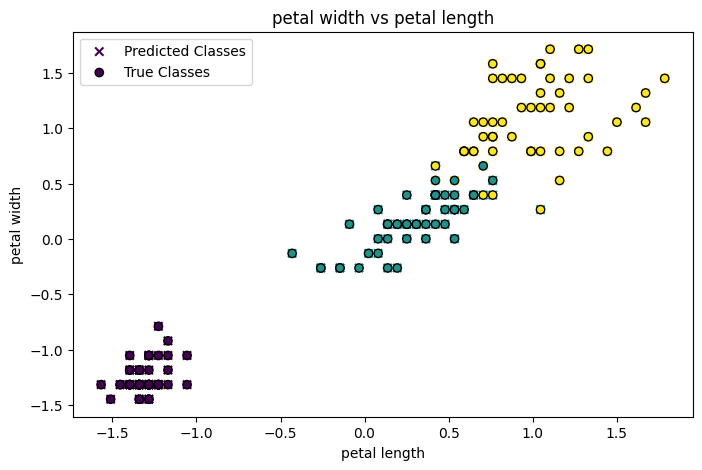

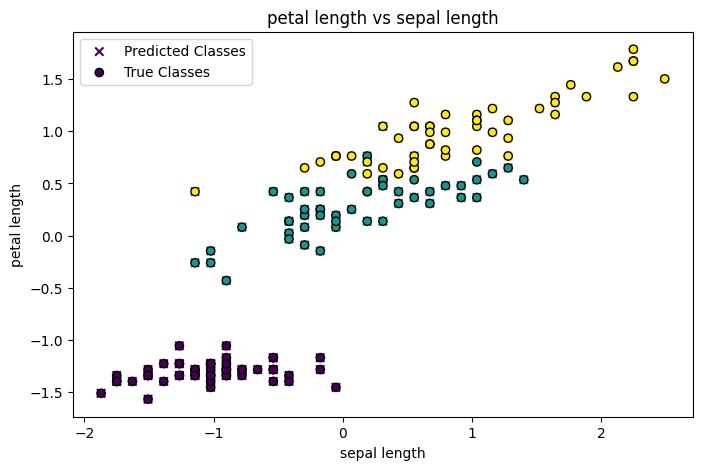

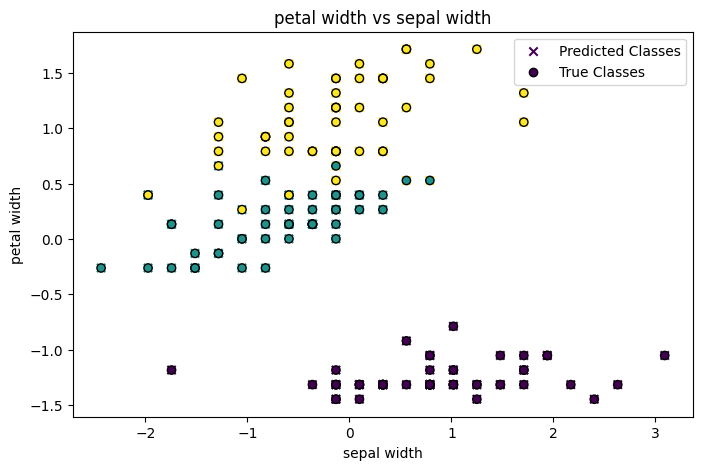

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

(X, y) = load_iris(return_X_y=True)
features = ["sepal length", "sepal width", "petal length", "petal width"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


models = []
for class_label in range(3):
    
    binary_y = (y == class_label).astype(int)
    
    
    model = LogisticRegression(max_iter=1000, solver='lbfgs')
    model.fit(X_scaled, binary_y)
    
    
    models.append(model)


predictions = np.array([model.predict_proba(X_scaled)[:, 1] for model in models]).T
y_pred = np.argmax(predictions, axis=1)  


report = classification_report(y, y_pred, target_names=["Class 0", "Class 1", "Class 2"])
print("Classification Report for Logistic Regression (One-vs-Rest):\n", report)


permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]
for i, j in permutations:
    plt.figure(figsize=(8, 5))
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X_scaled[:, i], X_scaled[:, j], marker="x", c=y_pred, cmap="viridis", label="Predicted Classes")
    plt.scatter(X_scaled[:, i], X_scaled[:, j], marker="o", facecolors='none', edgecolors='k', c=y, cmap="viridis", label="True Classes")
    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.legend(["Predicted Classes", "True Classes"])
    plt.show()
